# ws 01

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten #

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [25]:
target_img_shape = (64, 64)  

train_dir = 'train_set'  
val_dir = 'validation_set'  # 
test_dir = 'test_set'

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) 
train_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=target_img_shape,
                                                 batch_size=32,
                                                 class_mode='binary')


Found 1802 images belonging to 2 classes.


In [26]:
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    
val_set = val_datagen.flow_from_directory(val_dir,
                                            target_size=target_img_shape,
                                            batch_size=32,
                                            class_mode='binary')

Found 200 images belonging to 2 classes.


In [27]:
batch = next(train_set)
print(batch[0].shape)
print(batch[1].shape)

(32, 64, 64, 3)
(32,)


{'cat': 0, 'dog': 1}
(32, 64, 64, 3)
(32,)
0.0 0.9154218
class: 0.0


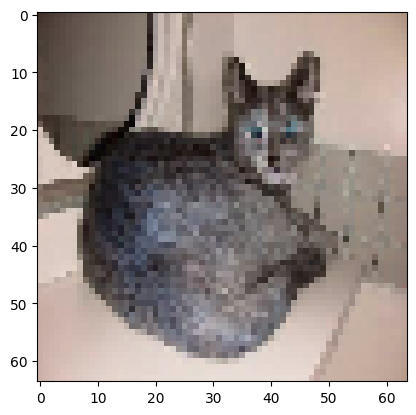

In [28]:
print(train_set.class_indices)
for image_batch, labels_batch in train_set:
    print(image_batch.shape)
    print(labels_batch.shape)
    
    img = image_batch[0] - image_batch[0].min()
    img /= 275.0
    
    print(img.min(), img.max())
    plt.imshow(img)

    print('class:', labels_batch[0])
    break

In [29]:
ids, counts = np.unique(train_set.classes, return_counts=True)

print(ids)
print(counts)

[0 1]
[901 901]


In [30]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels   

for i in ids:
    print('{:>6} = {}' . format(labels[i], counts[i]))

   cat = 901
   dog = 901


In [31]:
label_names = [k for k in train_set.class_indices]
label_names

['cat', 'dog']

In [32]:
import pandas as pd

df_train_labels = pd.DataFrame({'Label':label_names, 'Count':counts})
df_train_labels.set_index('Label', inplace=True)
df_train_labels

,Count
Label,
cat,901
dog,901


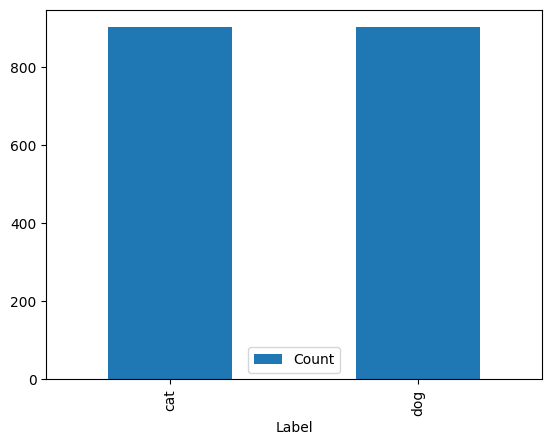

In [33]:
df_train_labels.plot.bar()
plt.show()

In [34]:
ids, counts = np.unique(val_set.classes, return_counts=True)
print(ids)
print(counts)

[0 1]
[100 100]


## Model 

In [35]:
in_shape = (target_img_shape[0], target_img_shape[1], 3)  
in_shape

(64, 64, 3)

In [36]:
base_model = VGG16(include_top=False, weights='imagenet',
                   input_shape=(64, 64, 3)) 

base_model.summary()   

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))  # 
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,089 (57.13 MB)

 Trainable params: 14,977,089 (57.13 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
for layer in model.layers:
    print('{:12} {}'.format(layer.name, layer.trainable)) 

vgg16        True
flatten_1    True
dense_2      True
dense_3      True


In [39]:
for layer in base_model.layers:
    print('{:13} {}'.format(layer.name, layer.trainable)) 

input_layer_2 True
block1_conv1  True
block1_conv2  True
block1_pool   True
block2_conv1  True
block2_conv2  True
block2_pool   True
block3_conv1  True
block3_conv2  True
block3_conv3  True
block3_pool   True
block4_conv1  True
block4_conv2  True
block4_conv3  True
block4_pool   True
block5_conv1  True
block5_conv2  True
block5_conv3  True
block5_pool   True


In [40]:
print("Trainable..\n---")
for variable in model.trainable_variables:
    print(variable.name)

Trainable..
---
kernel
bias
kernel
bias
kernel
bias
kernel
bias
kernel
bias
kernel
bias
kernel
bias
kernel
bias
kernel
bias
kernel
bias
kernel
bias
kernel
bias
kernel
bias
kernel
bias
kernel
bias


In [41]:
base_model.trainable = False 

In [42]:
print("Trainable..\n---")
for variable in model.trainable_variables:
    print(variable.name)

Trainable..
---
kernel
bias
kernel
bias


In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,089 (57.13 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [44]:
import time

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', verbose=1, patience=5) # 
#mc = ModelCheckpoint('TL1 tr300.h5', monitor='val_accuracy', verbose=1, save_best_only=True) #
mc = ModelCheckpoint('TL1_tr300.keras', monitor='val_accuracy', verbose=1, save_best_only=True)


start = time.time()
history = model.fit(train_set, 
                     validation_data=val_set, 
                    epochs=20, verbose=1, callbacks=[es, mc])

end = time.time()

print("Time Taken: {:.2f} minutes".format((end - start)/60))

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.7154 - loss: 4.6864
Epoch 1: val_accuracy improved from -inf to 0.86500, saving model to TL1_tr300.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.7164 - loss: 4.6602 - val_accuracy: 0.8650 - val_loss: 0.9645
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9123 - loss: 0.3651
Epoch 2: val_accuracy did not improve from 0.86500
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 208ms/step - accuracy: 0.9123 - loss: 0.3642 - val_accuracy: 0.8400 - val_loss: 0.7086
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.9717 - loss: 0.0806
Epoch 3: val_accuracy did not improve from 0.86500
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 209ms/step - accuracy: 0.9718 - loss: 0.0804 - val_accuracy: 0.8450 - val_loss: 0.7230
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.9963 - loss: 0.0188
Epoch 4: val_accuracy improved from 0.86500 to 0.87000, saving model to TL1_tr300.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 

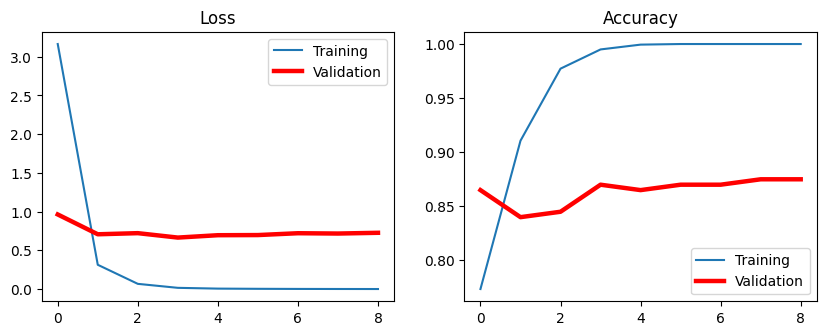

In [45]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)

plt.title('Loss')
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'],'r', lw=3.2, label='Validation')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')

plt.legend()
plt.show()

In [46]:
acc = model.evaluate(val_set,  verbose=1)
print('score = {:.3f}' .format(acc[1]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.8913 - loss: 0.5107
score = 0.875


## Predict

In [47]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict(img_fname):
    img = load_img(img_fname, target_size=target_img_shape) 

    plt.imshow(img)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    pred = model.predict(img)

    pred_cls = 'Dog' if pred > 0.5 else 'Cat'  # use this of
    print('Prediction:',pred_cls)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Prediction: Dog


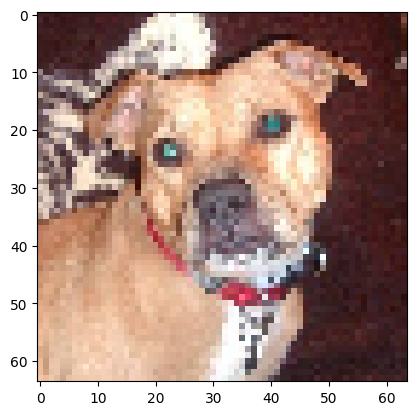

In [53]:
predict('test_set/2.jpg')

# ws 02 Fine-tune

In [54]:
print("Trainable..\n---")
for variable in model.trainable_variables:
    print(variable.name)   

Trainable..
---
kernel
bias
kernel
bias


In [55]:
base_model.trainable = True

for layer in base_model.layers[:-8]: 
    layer.trainable = False

for variable in model.trainable_variables:
    print(variable.name)

kernel
bias
kernel
bias
kernel
bias
kernel
bias
kernel
bias
kernel
bias
kernel
bias
kernel
bias


In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,501,893 (59.14 MB)

 Trainable params: 13,241,601 (50.51 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

 Optimizer params: 524,804 (2.00 MB)

In [57]:
base_model.trainable = True

for layer in base_model.layers:
    # print(layer.name[:11])
    if layer.name[:11] == 'block5_conv':
        layer.trainable = True # 
        print(layer.name, '-> True')

    else:
        layer.trainable = False
        print(layer.name, '-> F') # 

input_layer_2 -> F
block1_conv1 -> F
block1_conv2 -> F
block1_pool -> F
block2_conv1 -> F
block2_conv2 -> F
block2_pool -> F
block3_conv1 -> F
block3_conv2 -> F
block3_conv3 -> F
block3_pool -> F
block4_conv1 -> F
block4_conv2 -> F
block4_conv3 -> F
block4_pool -> F
block5_conv1 -> True
block5_conv2 -> True
block5_conv3 -> True
block5_pool -> F


In [58]:
print("Trainable..\n---")
for variable in model.trainable_variables:
    print(variable.name)  

Trainable..
---
kernel
bias
kernel
bias
kernel
bias
kernel
bias
kernel
bias


In [59]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [60]:
import time
start = time.time()

history = model.fit(train_set, steps_per_epoch=len(train_set),
                     validation_data=val_set, 
                     validation_steps=len(val_set), 
                    epochs=20, verbose=1, callbacks=[es, mc])

end = time.time()

print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 1: val_accuracy did not improve from 0.87500
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 350ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.8550 - val_loss: 0.9507
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 1.0000 - loss: 4.5165e-04
Epoch 3: val_accuracy improved from 0.87500 to 0.88000, saving model to TL1_tr300.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 329ms/step - accuracy: 1.0000 - loss: 4.5120e-04 - val_accuracy: 0.8800 - val_loss: 0.8993
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 1.0000 - loss: 2.2509e-04
Epoch 5: val_accuracy did not improve from 0.88000
57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 319ms/step - accuracy: 1.0000 - loss: 2.2417e-04 - val_accuracy: 0.8800 - val_loss: 0.9066
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 1.0000 - loss: 5.0811e-05
Epoch 7: val_accuracy did not improve from 0.88000
57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 322ms/step - accuracy: 1.0000 - loss: 5.0769e-05 - val_accuracy: 0.8750 - val_loss: 0.93

In [61]:
acc = model.evaluate(val_set, steps=len(val_set), verbose=1)
print('score = {:.3f}' .format(acc[1]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.9051 - loss: 0.8013
score = 0.875


# ws03 ResNet

In [62]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) 
train_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=target_img_shape,
                                                 batch_size=32, 
                                                 class_mode='binary') 

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) 
    
val_set = val_datagen.flow_from_directory(val_dir,
                                            target_size=target_img_shape,
                                            batch_size=32,
                                            class_mode='binary')

Found 1802 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [63]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


In [64]:
base_model = ResNet50(include_top=False, 
                    weights='imagenet',
                   input_shape=(64, 64, 3))  

model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))  # .
model.add(Dense(1, activation='sigmoid'))

model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2, 2, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,636,545 (93.98 MB)

 Trainable params: 24,583,425 (93.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [65]:
base_model.trainable = False #  

In [66]:
print("Trainable..\n---")
for variable in model.trainable_variables:
    print(variable.name)  

Trainable..
---
kernel
bias
kernel
bias


In [67]:
import time

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', verbose=1, patience=5) # 
#mc = ModelCheckpoint('TL1 tr300.h5', monitor='val_accuracy', verbose=1, save_best_only=True) #
mc = ModelCheckpoint('TL1_tr300.keras', monitor='val_accuracy', verbose=1, save_best_only=True)


start = time.time()
history = model.fit(train_set, 
                     validation_data=val_set, 
                    epochs=20, verbose=1, callbacks=[es, mc])

end = time.time()

print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.6444 - loss: 4.4191
Epoch 1: val_accuracy improved from -inf to 0.80000, saving model to TL1_tr300.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 224ms/step - accuracy: 0.6459 - loss: 4.3723 - val_accuracy: 0.8000 - val_loss: 0.4824
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.8731 - loss: 0.4727
Epoch 2: val_accuracy improved from 0.80000 to 0.85500, saving model to TL1_tr300.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 191ms/step - accuracy: 0.8729 - loss: 0.4728 - val_accuracy: 0.8550 - val_loss: 0.4712
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.8883 - loss: 0.4354
Epoch 3: val_accuracy improved from 0.85500 to 0.86500, saving model to TL1_tr300.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - accuracy: 0.8881 - loss: 0.4353 - val_accuracy: 0.8650 - val_loss: 0.4557
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9102 - loss: 0.3863
Epoch 4: val_accuracy did not improve fro